# Import Data into Pandas DataFrame 

In [339]:
# add matplotlib inline magic command
%matplotlib inline
# dependencies and setup 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv 


In [340]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"


In [341]:
# read the city data file and store it in a pandas dataframe
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [342]:
# read the ride data file and store it as a pandas data frame
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


## Inspect Data in DataFrames

## City Data

checking for nulls

In [343]:
# get columns and rows that are not null
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [344]:
# double check there arent any nulls
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

checking data types

In [345]:
# check the data type on the columns we will use for calculations
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [346]:
# check number of data points 
city_data_df.sum()

city            RichardfortWilliamsstadPort AngelaRodneyfortWe...
driver_count                                                 2973
type            UrbanUrbanUrbanUrbanUrbanUrbanUrbanUrbanUrbanU...
dtype: object

Get the types of cities

In [347]:
# get unique values of the type of city
city_data_df['type'].unique()


array(['Urban', 'Suburban', 'Rural'], dtype=object)

number of rides in urban cities

In [348]:
# get the numbder of data points for the urban cities
# make sure teh string you are looking for matches exactly, check your capitalization
sum(city_data_df['type']=='Urban')

66

number of rides in rural cities

In [349]:
# get number of rural data points
sum(city_data_df['type']=='Rural')

18

number of rides in suburban cities

In [350]:
# get number of suburban
sum(city_data_df['type']=='Suburban')

36

## Ride Data

checking for those nulls

In [351]:
# get the columns and rows that are not null
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [352]:
# double check it
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

get data types

In [353]:
# check the data types
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

# Merge DataFrames

* merging the 2 dataframes requires a common column, in this case 'city' is the column shared by both sets. 
* syntax follows this: new_df = pd.merge(leftdf, rightdf, on=["column_leftdf", "column_rightdf"])
* 'how=' parameter sometimes is used, either left right inner or outer, default is inner

In [354]:
# combine dataframes into single one
pyber_data_df = pd.merge(ride_data_df,city_data_df, how='left', on=['city','city'])

# print the new dataframe
pyber_data_df.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


# Create a Bubble Chart that Showcases Average Fare vs. Total Number of Rides with bubble size showing total number of drivers per city type (Urban, Suburban, Rural)

Create Dataframes for each Type of City 5.3.1

In [355]:
# create the urban city DataFrame
urban_cities_df = pyber_data_df[pyber_data_df['type']=='Urban']
urban_cities_df.head(10)


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


In [356]:
# create the suburban city DataFrame
suburban_cities_df = pyber_data_df[pyber_data_df['type']=='Suburban']
suburban_cities_df.head(10)

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban
1630,East Marymouth,2019-03-29 08:36:20,37.60,6370863861570,5,Suburban
1631,New Raymond,2019-02-25 21:40:18,20.44,5984505117874,17,Suburban
1632,Lake Robertside,2019-01-11 20:17:36,46.51,6574333011308,4,Suburban
1633,Josephside,2019-03-30 09:45:11,44.74,5592692102803,25,Suburban
1634,Brandonfort,2019-01-14 12:35:27,28.02,8100258078935,10,Suburban


In [357]:
# create the rural city DataFrame
rural_cities_df = pyber_data_df[pyber_data_df['type']=='Rural']
rural_cities_df.head(10)

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural
2255,Taylorhaven,2019-04-06 01:01:29,45.31,2275364435623,1,Rural
2256,Garzaport,2019-02-18 18:27:48,36.16,2928337561347,7,Rural
2257,New Ryantown,2019-01-27 17:33:41,42.68,7994603753131,2,Rural
2258,Lake Latoyabury,2019-04-02 21:00:22,13.46,8232864757802,2,Rural
2259,North Holly,2019-02-16 17:02:51,39.46,4571476032148,8,Rural


Number of Riders per City type 5.3.2

In [358]:
# group by city with count of rides per city, then select the ride_id column to show number of rides per urban city 
urban_ride_count = urban_cities_df.groupby(['city']).count()['ride_id']
urban_ride_count.head(10)

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
East Kaylahaven    29
Erikaland          12
Grahamburgh        25
Huntermouth        24
Hurleymouth        28
Name: ride_id, dtype: int64

In [359]:
# Create the suburban and rural ride count.
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]

rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]



 Average Fare per city per City Type 5.3.3

In [360]:
# get average fare for each city in the urban cities
urban_avg_fare = urban_cities_df.groupby(['city']).mean()['fare']
urban_avg_fare.head(10)

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
East Kaylahaven    23.757931
Erikaland          24.906667
Grahamburgh        25.221200
Huntermouth        28.993750
Hurleymouth        25.891429
Name: fare, dtype: float64

In [361]:
# Get average fare for each city in the suburban and rural cities.
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

Average number of drivers for each city type 5.3.4

In [362]:
# Get the average number of drivers for each urban city.
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [363]:
# Get the average number of drivers for each city for the suburban and rural cities.
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

## Bubble Charts 5.3.5

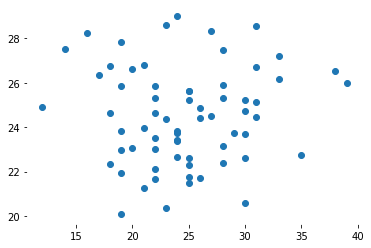

In [364]:
# using MATLAB method, build scatter plot for urban cities
plt.scatter(urban_ride_count, urban_avg_fare)

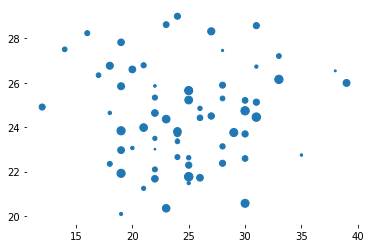

In [365]:
# Build the scatter plots for urban cities with bubble size showing number of drivers
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=urban_driver_count)

### Urban Bubble Chart

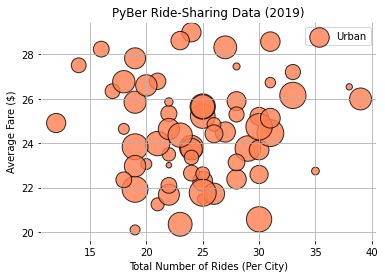

In [366]:
# Build the scatter plots for urban cities with x axis showing ride count, y axis avg fare, bubble size driver count.
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

### Suburban Bubble Chart

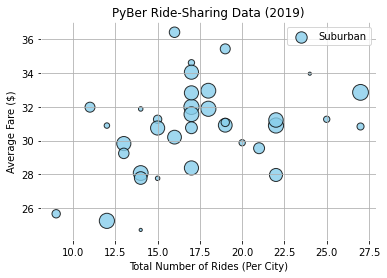

In [367]:
# Build the scatter plots for suburban cities.
plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

### Rural Bubble Chart

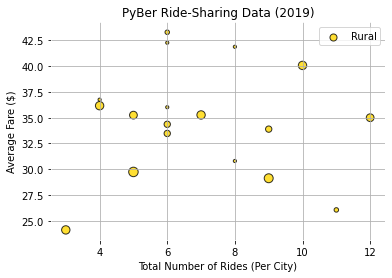

In [368]:
# Build the scatter plots for rural cities.
plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

### All city types bubble chart 5.3.6

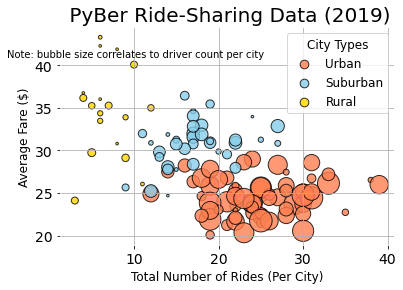

In [427]:
# Add the scatter charts for each type of city.
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=7*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=7*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=7*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

# adding graph properties, grid, labels, title
plt.title(' PyBer Ride-Sharing Data (2019)',fontsize=20)
plt.ylabel('Average Fare ($)', fontsize=12)
plt.xlabel('Total Number of Rides (Per City)', fontsize=12)
plt.grid(True)

# Legend and related parameters
legend = plt.legend(fontsize='12', mode='expanded',scatterpoints=1, loc='best', title='City Types')
legend.legendHandles[0]._sizes = [75]
legend.legendHandles[1]._sizes = [75]
legend.legendHandles[2]._sizes = [75]
legend.get_title().set_fontsize(12)

# text label for bubble size
plt.text( -5, 41, "Note: bubble size correlates to driver count per city", fontsize=10)

# save figure 
plt.savefig('Analysis/Fig1.png')

# Show the plot
plt.show()

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html

https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.legend.html

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html

# Determine the mean, median, and mode for Number of Rides, Average Fares, Number of drivers

## Summary Stats for Number of Riders by City Type 5.4.1

In [370]:
# get summary stats with .describe() method on the dataframe
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [371]:
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [372]:
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


### rider count stats per city type

#### using describe() method from Pandas

In [373]:
# summary stats for urban rider count
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [374]:
# stats for suburban rider count
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [375]:
# stats for rural rider count
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

#### using mean(), median(), mode() method from Pandas 

In [376]:
# mean ride count
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(), 2)

(24.62, 17.36, 6.94)

In [377]:
# median ride count
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(), 2)

(24.0, 17.0, 6.0)

In [378]:
# mode ride count
round(urban_ride_count.mode(),2), round(suburban_ride_count.mode(),2), round(rural_ride_count.mode(), 2)

(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

#### using numpy and scipy to calculate mean median mode

In [379]:
# import numpy and the stats module from scipy (if jupyter notebook is not installed to vs code or your python interpreter)
import numpy as np
import scipy.stats as sts

In [380]:
# calculate measures of central tendency (aka mean median mode) for ride count for urban cities
mean_urban_ride_count = np.mean(urban_ride_count)
print(f'the mean for the ride counts for urban trips is {mean_urban_ride_count}')

median_urban_ride_count = np.median(urban_ride_count)
print(f'the median for the ride counts for urban trips is {median_urban_ride_count}')

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f'mode for the ride counts for urban trips is {mode_urban_ride_count}')

the mean for the ride counts for urban trips is 24.62121212121212
the median for the ride counts for urban trips is 24.0
mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7]))


In [381]:
# calculate measures of central tendency (aka mean median mode) for ride count for urban cities
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f'the mean for the ride counts for urban trips is {mean_suburban_ride_count}')

median_suburban_ride_count = np.median(suburban_ride_count)
print(f'the median for the ride counts for urban trips is {median_suburban_ride_count}')

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f'mode for the ride counts for urban trips is {mode_suburban_ride_count}')

the mean for the ride counts for urban trips is 17.36111111111111
the median for the ride counts for urban trips is 17.0
mode for the ride counts for urban trips is ModeResult(mode=array([17], dtype=int64), count=array([7]))


In [382]:
# calculate measures of central tendency (aka mean median mode) for ride count for rural cities
mean_rural_ride_count = np.mean(rural_ride_count)
print(f'the mean for the ride counts for urban trips is {mean_rural_ride_count}')

median_rural_ride_count = np.median(rural_ride_count)
print(f'the median for the ride counts for urban trips is {median_rural_ride_count}')

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f'mode for the ride counts for urban trips is {mode_rural_ride_count}')

the mean for the ride counts for urban trips is 6.944444444444445
the median for the ride counts for urban trips is 6.0
mode for the ride counts for urban trips is ModeResult(mode=array([6], dtype=int64), count=array([5]))


## Summary Stats for Average Fare per City Type 5.4.2

### urban fares

In [383]:
# get the fares for the urban cities as a series
urban_fares = urban_cities_df['fare']
urban_fares.head(10)

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
5     9.52
6    43.25
7    35.98
8    35.09
9    42.81
Name: fare, dtype: float64

In [384]:
# calculate the measures of central tendency for avg fare for the urban cities
mean_urban_fares = np.mean(urban_fares)
print(f'mean fare price for urban trips is ${mean_urban_fares:.2f}.')

median_urban_fares = np.median(urban_fares)
print(f'median for fare price for urban trips is ${median_urban_fares:.2f}.')

mode_urban_fares = sts.mode(urban_fares)
print(f'mode fare price for urban trips is {mode_urban_fares}.')

mean fare price for urban trips is $24.53.
median for fare price for urban trips is $24.64.
mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


### suburban fares

In [385]:
# suburban fares series
suburban_fares = suburban_cities_df['fare']
suburban_fares.head(10)

1625    27.79
1626    18.75
1627    21.71
1628    17.10
1629    37.78
1630    37.60
1631    20.44
1632    46.51
1633    44.74
1634    28.02
Name: fare, dtype: float64

In [386]:
# calculate the measures of central tendency for avg fare for the suburban cities
mean_suburban_fares = np.mean(suburban_fares)
print(f'mean fare price for suburban trips is ${mean_suburban_fares:.2f}.')

median_suburban_fares = np.median(suburban_fares)
print(f'median for fare price for suburban trips is ${median_suburban_fares:.2f}.')

mode_suburban_fares = sts.mode(suburban_fares)
print(f'mode fare price for suburban trips is {mode_suburban_fares}.')

mean fare price for suburban trips is $30.97.
median for fare price for suburban trips is $30.75.
mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).


### rural fares

In [387]:
# rural fares series
rural_fares = rural_cities_df['fare']
rural_fares.head(10)

2250    43.22
2251    12.42
2252    54.85
2253    47.90
2254    51.80
2255    45.31
2256    36.16
2257    42.68
2258    13.46
2259    39.46
Name: fare, dtype: float64

In [388]:
# calculate the measures of central tendency for avg fare for the rural cities
mean_rural_fares = np.mean(rural_fares)
print(f'mean fare price for rural trips is ${mean_rural_fares:.2f}.')

median_rural_fares = np.median(rural_fares)
print(f'median for fare price for rural trips is ${median_rural_fares:.2f}.')

mode_rural_fares = sts.mode(rural_fares)
print(f'mode fare price for rural trips is {mode_rural_fares}.')

mean fare price for rural trips is $34.62.
median for fare price for rural trips is $37.05.
mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


## Summary Stats for Number of Drivers per city type 5.4.3 

In [389]:
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [390]:
# get driver count from urban cities df
urban_drivers = urban_cities_df['driver_count']
urban_drivers.head(10)

0     5
1    72
2    57
3    34
4    46
5    10
6    44
7    21
8     4
9    33
Name: driver_count, dtype: int64

### urban driver count stats

In [391]:
mean_urban_driver_count = np.mean(urban_drivers)
print(f'average driver count in urban cities is {mean_urban_driver_count}.')

median_urban_driver_count = np.median(urban_drivers)
print(f'median driver count in urban cities is {median_urban_driver_count}.')

mode_urban_driver_count = sts.mode(urban_drivers)
print(f'mode for driver count in urban cities is {mode_urban_driver_count}')

average driver count in urban cities is 36.67815384615385.
median driver count in urban cities is 37.0.
mode for driver count in urban cities is ModeResult(mode=array([39], dtype=int64), count=array([86]))


### suburban driver stats

In [392]:
suburban_drivers = suburban_cities_df['driver_count']
suburban_drivers.head()

1625    11
1626    20
1627    22
1628    19
1629    12
Name: driver_count, dtype: int64

In [393]:
mean_suburban_driver_count = np.mean(suburban_drivers)
print(f'average driver count in suburban cities is {mean_suburban_driver_count}.')

median_suburban_driver_count = np.median(suburban_drivers)
print(f'median driver count in suburban cities is {median_suburban_driver_count}.')

mode_suburban_driver_count = sts.mode(suburban_drivers)
print(f'mode for driver count in suburban cities is {mode_suburban_driver_count}')

average driver count in suburban cities is 13.712.
median driver count in suburban cities is 16.0.
mode for driver count in suburban cities is ModeResult(mode=array([20], dtype=int64), count=array([79]))


### rural driver stats

In [394]:
rural_drivers = rural_cities_df['driver_count']
rural_drivers.head()

2250    9
2251    8
2252    6
2253    2
2254    2
Name: driver_count, dtype: int64

In [395]:
mean_rural_driver_count = np.mean(rural_drivers)
print(f'average driver count in rural cities is {mean_rural_driver_count}.')

median_rural_driver_count = np.median(rural_drivers)
print(f'median driver count in rural cities is {median_rural_driver_count}.')

mode_rural_driver_count = sts.mode(rural_drivers)
print(f'mode for driver count in rural cities is {mode_rural_driver_count}')

average driver count in rural cities is 4.296.
median driver count in rural cities is 4.0.
mode for driver count in rural cities is ModeResult(mode=array([1], dtype=int64), count=array([32]))


# Create Box-and-Whisker Plots 5.4.4

## rider count box n whisker

### urban box and whisker

<function matplotlib.pyplot.show(close=None, block=None)>

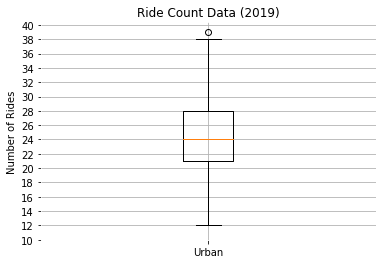

In [396]:
# create box n whisker plot for urban cities

# create x labels with list called 'Urban'
x_labels = ['Urban']
# data from list and label is passed in boxplot function
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)

# add title, y labels, and grid
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()

# show plot
plt.show


### suburban box n whisker

<function matplotlib.pyplot.show(close=None, block=None)>

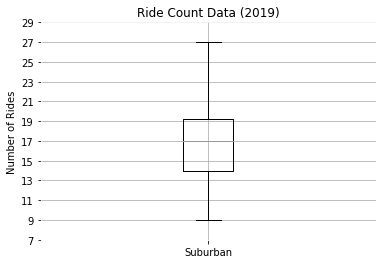

In [397]:
# create box n whisker plot for suburban cities

# create x labels with list called 'Suburban'
x_labels = ['Suburban']
# data from list and label is passed in boxplot function
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)

# add title, y labels, and grid
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(7, 30, step=2.0))
ax.grid()

# show plot
plt.show

### rural box n whisker

<function matplotlib.pyplot.show(close=None, block=None)>

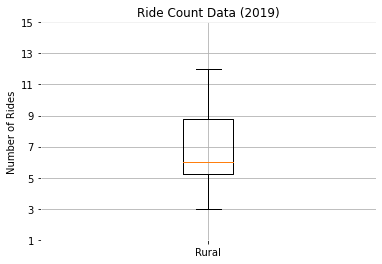

In [398]:
# create box n whisker plot for rural cities

# create x labels with list called 'Rural  '
x_labels = ['Rural']
# data from list and label is passed in boxplot function
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels=x_labels)

# add title, y labels, and grid
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(1, 17, step=2.0))
ax.grid()

# show plot
plt.show

### All city types box n whisker

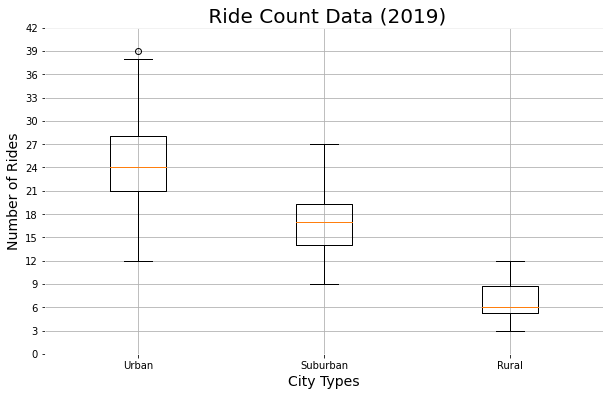

In [399]:
# all ride count box n whisker plot 
x_labels = ['Urban', 'Suburban', 'Rural']
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10,6))
ax.set_title(' Ride Count Data (2019)', fontsize=20)
ax.set_ylabel('Number of Rides', fontsize=14)
ax.set_xlabel('City Types', fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()

plt.savefig('Analysis/Fig2.png')
plt.show()

### Outliers

In [400]:
# Get the city that matches 39.
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


## ride fare box n whisker

### urban fares

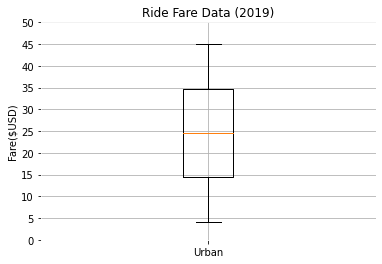

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [401]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

### suburban fares

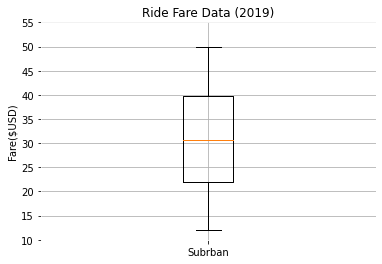

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [402]:
# Create a box-and-whisker plot for the suburban fare data.
x_labels = ["Subrban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(10, 60, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_fares.describe()

### rural fares

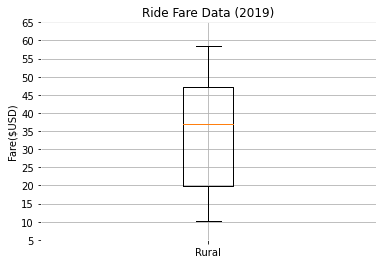

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [403]:
# Create a box-and-whisker plot for the rural fare data.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(5, 70, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_fares.describe()

### all city types fare box whisker plot

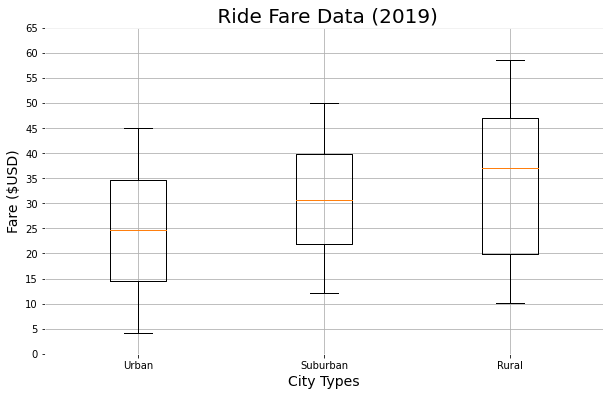

In [404]:
# all city type fares box n whisker plot 
x_labels = ['Urban', 'Suburban', 'Rural']
ride_fare_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10,6))
ax.set_title(' Ride Fare Data (2019)', fontsize=20)
ax.set_ylabel('Fare ($USD)', fontsize=14)
ax.set_xlabel('City Types', fontsize=14)
ax.boxplot(ride_fare_data, labels=x_labels)
ax.set_yticks(np.arange(0, 70, step=5.0))
ax.grid()


plt.savefig('Analysis/Fig3.png')
plt.show()


## driver count box and whisker

### urban driver count bwp

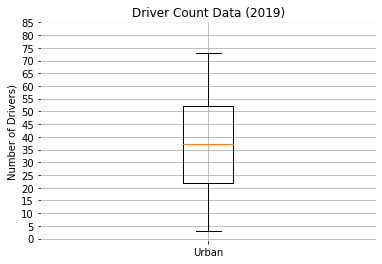

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [405]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

### suburban

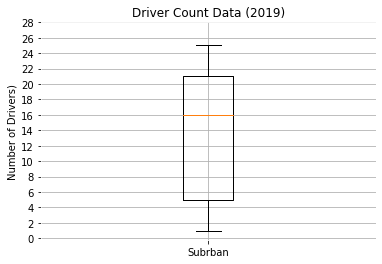

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [406]:
# Create the box-and-whisker plot for the suburban driver count data.
x_labels = ["Subrban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 30, step=2.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_drivers.describe()

### rural

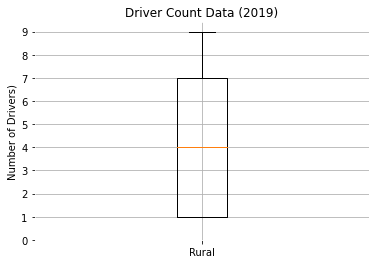

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [407]:
# Create the box-and-whisker plot for the rural driver count data.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 10, step=1.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_drivers.describe()

### all city type driver count bwp

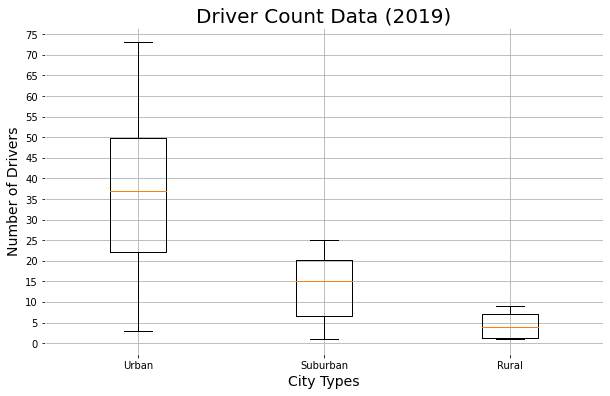

In [408]:
# all city type driver count box n whisker plot 
x_labels = ['Urban', 'Suburban', 'Rural']
ride_driver_data = [urban_driver_count, suburban_driver_count, rural_driver_count]
fig, ax = plt.subplots(figsize=(10,6))
ax.set_title('Driver Count Data (2019)', fontsize=20)
ax.set_ylabel('Number of Drivers', fontsize=14)
ax.set_xlabel('City Types', fontsize=14)
ax.boxplot(ride_driver_data, labels=x_labels)
ax.set_yticks(np.arange(0, 80, step=5.0))
ax.grid()


plt.savefig('Analysis/Fig4.png')
plt.show()

https://matplotlib.org/stable/gallery/index.html#statistics
https://matplotlib.org/examples/statistics/boxplot_demo.html

# Create Pie Charts to Visualize Data by City Type

## Percentages of Fares for each City Type 5.5.1

In [409]:
sum_fares_by_type = pyber_data_df.groupby(['type']).sum()['fare']
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [410]:
total_fares = pyber_data_df.sum()['fare']
total_fares

63538.64

In [411]:
type_percents = 100* pyber_data_df.groupby(['type']).sum()['fare']/pyber_data_df.sum()['fare']
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

### Percentage of Fares by City Type Pie Chart

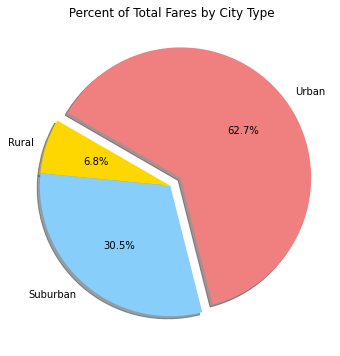

In [412]:
# import matplotlib library
import matplotlib as mpl

# build pie chart
plt.subplots(figsize=(10, 6))
plt.pie(type_percents, 
    labels=['Rural', 'Suburban', 'Urban'],
    colors=['gold','lightskyblue','lightcoral'],
    explode=[0,0,0.1],
    autopct='%1.1f%%',
    shadow=True,
    startangle=150 )
plt.title(' Percent of Total Fares by City Type')

# change default font size from 10 to 14
mpl.rcParams['font.size'] = 14
mpl.rcParams['axes.facecolor'] = 'white'
# Save fig
plt.savefig('analysis/fig5.png')

# show fig
plt.show()